# Data preparation

## Imports & data

In [448]:
import pandas as pd
athletes = pd.read_csv("../dataset/Olympic_Athlete_Bio.csv")
athlete_results = pd.read_csv("../dataset/Olympic_Athlete_Event_Results.csv")
countries = pd.read_csv("../dataset/Olympics_Country.csv")
games = pd.read_csv("../dataset/Olympics_Games.csv")

- Merge weight, height, born and sex

In [449]:
dataset = athlete_results.merge(athletes[['athlete_id','weight', 'height', 'born', 'sex']], on='athlete_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314902,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female
314903,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female
314904,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female
314905,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female


- Merge country

In [450]:
dataset = dataset.merge(countries[['country_noc', 'country']], on='country_noc', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,country
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,Australasia
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,Australasia
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,Australasia
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,Australasia
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,Australasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,Netherlands
316087,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,Slovakia
316088,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,Republic of Korea
316089,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,Jamaica


- Merge year and city

In [451]:
dataset = dataset.merge(games[['edition_id', 'year', 'city']], on='edition_id', how='left')
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Remove teamsports, keep only individual sports

In [452]:
dataset = dataset[dataset['isTeamSport'] == False]
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Remove results that don't have a medal

In [453]:
# dataset = dataset[dataset['medal'] != 'na']
dataset

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,na,False,na,na,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,na,False,na,na,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,na,False,na,na,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,na,False,na,na,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,na,False,na,na,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,62,NED,Bobsleigh,"Monobob, Women",19019671,Karlien Sleper,148662,16,na,False,na,na,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,62,SVK,Bobsleigh,"Monobob, Women",19019671,Viktória Čerňanská,138683,17,na,False,76,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,62,KOR,Bobsleigh,"Monobob, Women",19019671,Kim Yu-Ran,137542,18,na,False,78,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,62,JAM,Bobsleigh,"Monobob, Women",19019671,Jazmine Fenlator-Victorian,128682,19,na,False,75-78,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Remove columns

In [454]:

dataset = dataset.drop(columns=['edition_id', 'result_id', 'athlete_id', 'isTeamSport'])
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,DNS,na,na,na,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,ANZ,Athletics,"400 metres, Men",Henry Murray,DNS,na,na,na,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Harvey Sutton,3 h8 r1/2,na,na,na,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Guy Haskins,DNS,na,na,na,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Joseph Lynch,DNS,na,na,na,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,NED,Bobsleigh,"Monobob, Women",Karlien Sleper,16,na,na,na,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,KOR,Bobsleigh,"Monobob, Women",Kim Yu-Ran,18,na,78,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,JAM,Bobsleigh,"Monobob, Women",Jazmine Fenlator-Victorian,19,na,75-78,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Convert height and weight to numeric value

In [455]:
dataset.loc[:, 'height'] = pd.to_numeric(dataset['height'], errors='coerce')
dataset.loc[:, 'weight'] = pd.to_numeric(dataset['weight'], errors='coerce')
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,DNS,na,NaN,NaN,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,ANZ,Athletics,"400 metres, Men",Henry Murray,DNS,na,NaN,NaN,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Harvey Sutton,3 h8 r1/2,na,NaN,NaN,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Guy Haskins,DNS,na,NaN,NaN,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Joseph Lynch,DNS,na,NaN,NaN,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,NED,Bobsleigh,"Monobob, Women",Karlien Sleper,16,na,NaN,NaN,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,KOR,Bobsleigh,"Monobob, Women",Kim Yu-Ran,18,na,78.0,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,JAM,Bobsleigh,"Monobob, Women",Jazmine Fenlator-Victorian,19,na,NaN,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Convert born to date value

In [456]:
dataset['born'] = pd.to_datetime(dataset['born'], errors='coerce')
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city
0,1908 Summer Olympics,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,DNS,na,NaN,NaN,1889-06-17,Male,Australasia,1908,London
1,1908 Summer Olympics,ANZ,Athletics,"400 metres, Men",Henry Murray,DNS,na,NaN,NaN,1886-01-14,Male,Australasia,1908,London
2,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Harvey Sutton,3 h8 r1/2,na,NaN,NaN,1882-02-18,Male,Australasia,1908,London
3,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Guy Haskins,DNS,na,NaN,NaN,1883-12-23,Male,Australasia,1908,London
4,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Joseph Lynch,DNS,na,NaN,NaN,1878-04-22,Male,Australasia,1908,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,NED,Bobsleigh,"Monobob, Women",Karlien Sleper,16,na,NaN,NaN,1993-01-11,Female,Netherlands,2022,Beijing
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing
316088,2022 Winter Olympics,KOR,Bobsleigh,"Monobob, Women",Kim Yu-Ran,18,na,78.0,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing
316089,2022 Winter Olympics,JAM,Bobsleigh,"Monobob, Women",Jazmine Fenlator-Victorian,19,na,NaN,175.0,1985-08-29,Female,Jamaica,2022,Beijing


- Calculate `bmi` and add this to a new column

In [457]:
dataset.loc[:, 'bmi'] = pd.to_numeric(dataset['weight'] / ((dataset['height'] / 100) ** 2))
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi
0,1908 Summer Olympics,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,DNS,na,NaN,NaN,1889-06-17,Male,Australasia,1908,London,NaN
1,1908 Summer Olympics,ANZ,Athletics,"400 metres, Men",Henry Murray,DNS,na,NaN,NaN,1886-01-14,Male,Australasia,1908,London,NaN
2,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Harvey Sutton,3 h8 r1/2,na,NaN,NaN,1882-02-18,Male,Australasia,1908,London,NaN
3,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Guy Haskins,DNS,na,NaN,NaN,1883-12-23,Male,Australasia,1908,London,NaN
4,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Joseph Lynch,DNS,na,NaN,NaN,1878-04-22,Male,Australasia,1908,London,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,NED,Bobsleigh,"Monobob, Women",Karlien Sleper,16,na,NaN,NaN,1993-01-11,Female,Netherlands,2022,Beijing,NaN
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327
316088,2022 Winter Olympics,KOR,Bobsleigh,"Monobob, Women",Kim Yu-Ran,18,na,78.0,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing,26.989619
316089,2022 Winter Olympics,JAM,Bobsleigh,"Monobob, Women",Jazmine Fenlator-Victorian,19,na,NaN,175.0,1985-08-29,Female,Jamaica,2022,Beijing,NaN


- Calculate `age` and add this to new column

In [458]:
dataset['age'] = dataset['year'] - dataset['born'].dt.year
dataset


,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi,age
0,1908 Summer Olympics,ANZ,Athletics,"100 metres, Men",Ernest Hutcheon,DNS,na,NaN,NaN,1889-06-17,Male,Australasia,1908,London,NaN,19.0
1,1908 Summer Olympics,ANZ,Athletics,"400 metres, Men",Henry Murray,DNS,na,NaN,NaN,1886-01-14,Male,Australasia,1908,London,NaN,22.0
2,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Harvey Sutton,3 h8 r1/2,na,NaN,NaN,1882-02-18,Male,Australasia,1908,London,NaN,26.0
3,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Guy Haskins,DNS,na,NaN,NaN,1883-12-23,Male,Australasia,1908,London,NaN,25.0
4,1908 Summer Olympics,ANZ,Athletics,"800 metres, Men",Joseph Lynch,DNS,na,NaN,NaN,1878-04-22,Male,Australasia,1908,London,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316086,2022 Winter Olympics,NED,Bobsleigh,"Monobob, Women",Karlien Sleper,16,na,NaN,NaN,1993-01-11,Female,Netherlands,2022,Beijing,NaN,29.0
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327,20.0
316088,2022 Winter Olympics,KOR,Bobsleigh,"Monobob, Women",Kim Yu-Ran,18,na,78.0,170.0,1992-04-23,Female,Republic of Korea,2022,Beijing,26.989619,30.0
316089,2022 Winter Olympics,JAM,Bobsleigh,"Monobob, Women",Jazmine Fenlator-Victorian,19,na,NaN,175.0,1985-08-29,Female,Jamaica,2022,Beijing,NaN,37.0


- Clear records with `NaN` for `bmi`

In [459]:
dataset.dropna(subset=['bmi'], inplace=True)
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi,age
9,1908 Summer Olympics,ANZ,Athletics,"1,500 metres, Men",George Blake,DNS,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
10,1908 Summer Olympics,ANZ,Athletics,"5 miles, Men",George Blake,3 h1 r1/2,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
15,1908 Summer Olympics,ANZ,Athletics,"Marathon, Men",George Blake,DNF,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
20,1908 Summer Olympics,ANZ,Athletics,"3,500 metres Race Walk, Men",Harry Kerr,3,Bronze,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0
22,1908 Summer Olympics,ANZ,Athletics,"10 miles Race Walk, Men",Harry Kerr,DNS r2/2,na,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316082,2022 Winter Olympics,ROU,Bobsleigh,"Monobob, Women",Andreea Grecu,12,na,74.0,180.0,1994-01-10,Female,Romania,2022,Beijing,22.839506,28.0
316083,2022 Winter Olympics,GER,Bobsleigh,"Monobob, Women",Mariama Jamanka,13,na,75.0,169.0,1990-08-23,Female,Germany,2022,Beijing,26.259585,32.0
316084,2022 Winter Olympics,AUT,Bobsleigh,"Monobob, Women",Kati Beierl,14,na,73.0,171.0,1993-08-16,Female,Austria,2022,Beijing,24.964946,29.0
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327,20.0


- Change weight, height and pos to numeric

In [460]:
dataset['height'] = pd.to_numeric(dataset['height'])
dataset['weight'] = pd.to_numeric(dataset['weight'])
dataset['pos'] = pd.to_numeric(dataset['pos'], errors="coerce")
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi,age
9,1908 Summer Olympics,ANZ,Athletics,"1,500 metres, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
10,1908 Summer Olympics,ANZ,Athletics,"5 miles, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
15,1908 Summer Olympics,ANZ,Athletics,"Marathon, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0
20,1908 Summer Olympics,ANZ,Athletics,"3,500 metres Race Walk, Men",Harry Kerr,3.0,Bronze,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0
22,1908 Summer Olympics,ANZ,Athletics,"10 miles Race Walk, Men",Harry Kerr,NaN,na,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316082,2022 Winter Olympics,ROU,Bobsleigh,"Monobob, Women",Andreea Grecu,12.0,na,74.0,180.0,1994-01-10,Female,Romania,2022,Beijing,22.839506,28.0
316083,2022 Winter Olympics,GER,Bobsleigh,"Monobob, Women",Mariama Jamanka,13.0,na,75.0,169.0,1990-08-23,Female,Germany,2022,Beijing,26.259585,32.0
316084,2022 Winter Olympics,AUT,Bobsleigh,"Monobob, Women",Kati Beierl,14.0,na,73.0,171.0,1993-08-16,Female,Austria,2022,Beijing,24.964946,29.0
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17.0,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327,20.0


* Simplify Gold/Medal/Bronze to win or loss

In [461]:
dataset['podium'] = (dataset['medal'] != 'na').astype(int)
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi,age,podium
9,1908 Summer Olympics,ANZ,Athletics,"1,500 metres, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
10,1908 Summer Olympics,ANZ,Athletics,"5 miles, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
15,1908 Summer Olympics,ANZ,Athletics,"Marathon, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
20,1908 Summer Olympics,ANZ,Athletics,"3,500 metres Race Walk, Men",Harry Kerr,3.0,Bronze,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0,1
22,1908 Summer Olympics,ANZ,Athletics,"10 miles Race Walk, Men",Harry Kerr,NaN,na,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316082,2022 Winter Olympics,ROU,Bobsleigh,"Monobob, Women",Andreea Grecu,12.0,na,74.0,180.0,1994-01-10,Female,Romania,2022,Beijing,22.839506,28.0,0
316083,2022 Winter Olympics,GER,Bobsleigh,"Monobob, Women",Mariama Jamanka,13.0,na,75.0,169.0,1990-08-23,Female,Germany,2022,Beijing,26.259585,32.0,0
316084,2022 Winter Olympics,AUT,Bobsleigh,"Monobob, Women",Kati Beierl,14.0,na,73.0,171.0,1993-08-16,Female,Austria,2022,Beijing,24.964946,29.0,0
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17.0,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327,20.0,0


## Final dataset

In [462]:
dataset

,edition,country_noc,sport,event,athlete,pos,medal,weight,height,born,sex,country,year,city,bmi,age,podium
9,1908 Summer Olympics,ANZ,Athletics,"1,500 metres, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
10,1908 Summer Olympics,ANZ,Athletics,"5 miles, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
15,1908 Summer Olympics,ANZ,Athletics,"Marathon, Men",George Blake,NaN,na,62.0,167.0,1878-09-04,Male,Australasia,1908,London,22.230987,30.0,0
20,1908 Summer Olympics,ANZ,Athletics,"3,500 metres Race Walk, Men",Harry Kerr,3.0,Bronze,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0,1
22,1908 Summer Olympics,ANZ,Athletics,"10 miles Race Walk, Men",Harry Kerr,NaN,na,76.0,184.0,1879-01-28,Male,Australasia,1908,London,22.448015,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316082,2022 Winter Olympics,ROU,Bobsleigh,"Monobob, Women",Andreea Grecu,12.0,na,74.0,180.0,1994-01-10,Female,Romania,2022,Beijing,22.839506,28.0,0
316083,2022 Winter Olympics,GER,Bobsleigh,"Monobob, Women",Mariama Jamanka,13.0,na,75.0,169.0,1990-08-23,Female,Germany,2022,Beijing,26.259585,32.0,0
316084,2022 Winter Olympics,AUT,Bobsleigh,"Monobob, Women",Kati Beierl,14.0,na,73.0,171.0,1993-08-16,Female,Austria,2022,Beijing,24.964946,29.0,0
316087,2022 Winter Olympics,SVK,Bobsleigh,"Monobob, Women",Viktória Čerňanská,17.0,na,76.0,175.0,2002-03-29,Female,Slovakia,2022,Beijing,24.816327,20.0,0


## Correlation

In [463]:
dataset.corr(numeric_only=True)

,pos,weight,height,year,bmi,age,podium
pos,1.000000,-0.108846,-0.047226,0.087689,-0.111646,0.028674,-0.391018
weight,-0.108846,1.000000,0.763517,-0.001529,0.853101,0.209133,0.062294
height,-0.047226,0.763517,1.000000,0.025346,0.326938,0.149141,0.043545
year,0.087689,-0.001529,0.025346,1.000000,-0.029623,0.119935,-0.028870
bmi,-0.111646,0.853101,0.326938,-0.029623,1.000000,0.204929,0.054075
age,0.028674,0.209133,0.149141,0.119935,0.204929,1.000000,0.010985
podium,-0.391018,0.062294,0.043545,-0.028870,0.054075,0.010985,1.000000


### Correlation by sport

In [464]:
for sport in dataset['sport'].unique():
    sport_data = dataset[dataset['sport'] == sport]
    print(sport)
    print(sport_data.corr(numeric_only=True))
    print("\n")

Athletics
             pos    weight    height      year       bmi       age    podium
pos     1.000000 -0.281106 -0.280542  0.278174 -0.231869  0.248288 -0.359013
weight -0.281106  1.000000  0.748481 -0.072277  0.907109  0.055209  0.065877
height -0.280542  0.748481  1.000000 -0.054524  0.411623  0.000891  0.066317
year    0.278174 -0.072277 -0.054524  1.000000 -0.083662  0.170496 -0.102089
bmi    -0.231869  0.907109  0.411623 -0.083662  1.000000  0.066591  0.048552
age     0.248288  0.055209  0.000891  0.170496  0.066591  1.000000  0.000101
podium -0.359013  0.065877  0.066317 -0.102089  0.048552  0.000101  1.000000


Boxing
             pos    weight    height      year       bmi       age    podium
pos     1.000000  0.012895 -0.013968  0.036237  0.029755  0.041714 -0.721378
weight  0.012895  1.000000  0.803379  0.046318  0.839557  0.158901  0.072109
height -0.013968  0.803379  1.000000  0.123111  0.361869  0.089771  0.070143
year    0.036237  0.046318  0.123111  1.000000 -0.044214 

## Graphs

In [465]:
import matplotlib.pyplot as plt

### BMI distribution

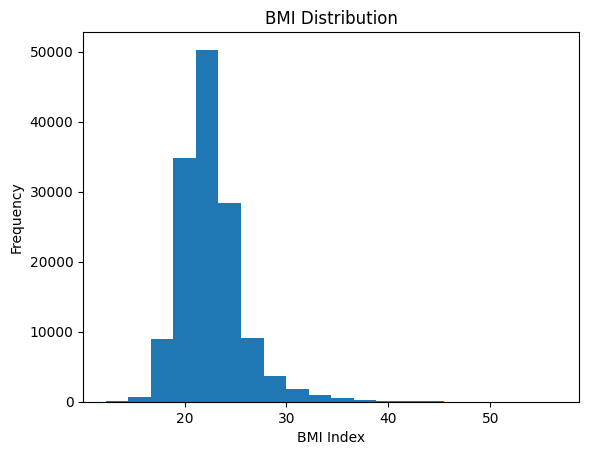

In [466]:
import math as math

# This code is in comments to more easily compare with the Z-indexed values.
# Uncomment to a get different view, where you only see 'nomal range' BMIs. This gives a better look at the distribution for the average athlete.

# minBmi = math.floor(dataset['bmi'].min())
# maxBmi = 35 # not math.ceil(dataset['bmi'].max()) as it goes up to 55 and is not relevant to display the thing we want to actually show ...
# bins = list(range(minBmi, maxBmi))

dataset['bmi'].plot(kind = 'hist', bins = 20)
# plt.xticks(bins)

plt.title('BMI Distribution')
plt.xlabel("BMI Index")
plt.show()

### BMI distribution (Z-Indexed)

Text(0.5, 0, 'BMI Index (Z-Indexed)')

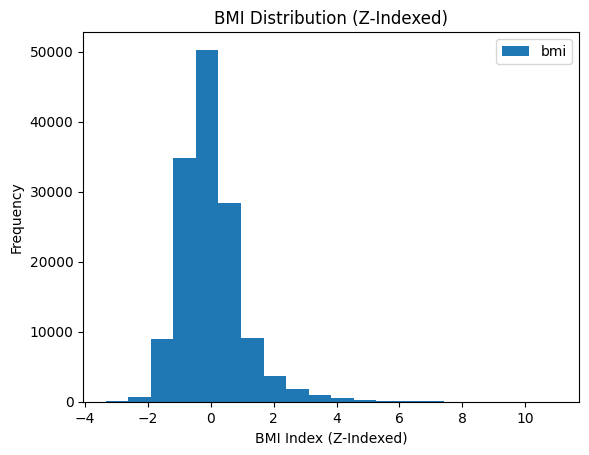

In [467]:
# pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler
import math as math

bmi_z = StandardScaler().fit_transform(dataset[['bmi']]);
bmi_z = pd.DataFrame(bmi_z, columns = ['bmi'])

bmi_z.plot(kind = 'hist', bins = 20)
plt.title('BMI Distribution (Z-Indexed)')
plt.xlabel("BMI Index (Z-Indexed)")

### Age vs BMI

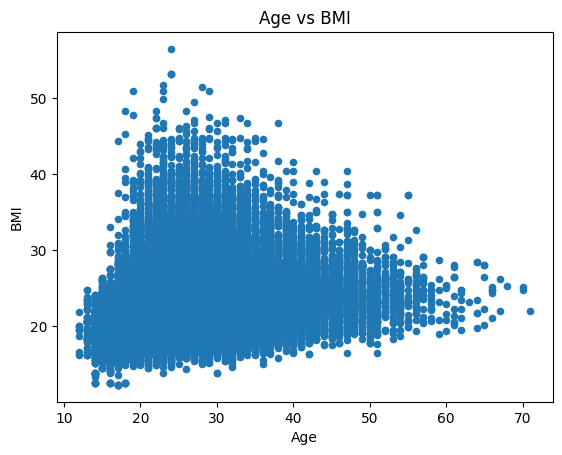

In [468]:

dataset.plot(x='age', y='bmi', kind='scatter')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()


### BMI vs Weight

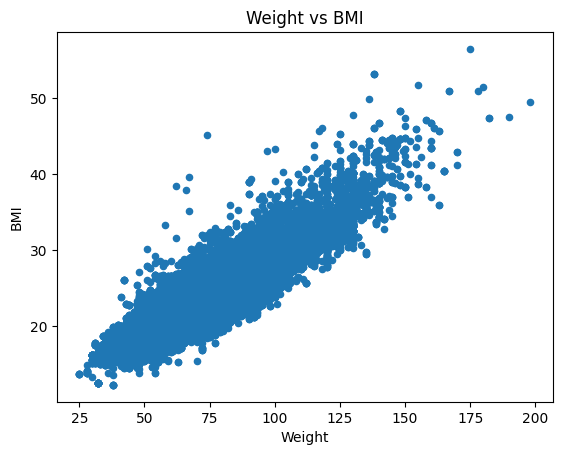

In [469]:
dataset.plot(x='weight', y='bmi', kind='scatter')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Weight vs BMI')
plt.show()

# Creating and training model

## KNN - Likelyhood of winning a medal (= being on podium) based on width/height

In [470]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

dependant_predictors = dataset["podium"].values
independant_predictors = dataset[["weight", "height"]].values

# Scale the features as weight and height are not similar scales
scaler = StandardScaler()
independant_predictors = scaler.fit_transform(independant_predictors)

knn = KNeighborsClassifier(n_neighbors = 15)

x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors, random_state = 42, test_size= 0.3, stratify = dependant_predictors)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("Predictions: {}".format(y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("KNN Score: " + str(knn.score(x_test, y_test)))



Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.92
KNN Score: 0.9150702578905933


In [471]:
# LINEAR REGRESSION AS EXAMPLE/TEST
# from sklearn.model_selection import train_test_split
# from sklearn import LinearRegression

# dependant_predictors = ["medal"]
# independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi"] # would this really need weight/height as it is a function of BMI? Possibly height/weight still has some individual factors?

# dataset_dependant = dataset[dependant_predictors]
# dataset_independant = dataset[independant_predictors]

# x_train, x_test, y_train, y_test = train_test_split(independant_predictors, dependant_predictors)
# model = LinearRegression().fit(x_train, y_train)


# RANDOM CLASSIFIER, WIP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is a pandas DataFrame
dependant_predictors = ["medal"]
independant_predictors = ["weight", "height", "age", "sex", "sport", "bmi"]

# Convert categorical variables to numerical
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['sport'] = le.fit_transform(dataset['sport'])

dataset_dependant = dataset[dependant_predictors]
dataset_independant = dataset[independant_predictors]

X_train, X_test, y_train, y_test = train_test_split(dataset_independant, dataset_dependant, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

# Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array(['na', 'na', 'na', ..., 'na', 'na', 'na'], dtype=object)